In [499]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as ex

import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Load data

In [500]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [501]:
df_test1 = df_test.copy()

## Explore the data

In [502]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [503]:
# import numpy as np

# train_columns =  df_train.columns.to_list()
# test_columns =  df_test.columns.to_list()

# print('train columns:',train_columns)
# print('train num columns:', len(train_columns))
# print('test columns:', test_columns)
# print('test num columns:', len(test_columns))

In [504]:
print('Number of train exmaples:', len(df_train))
print('Number of features:', len(df_train.columns.to_list()))
print('Features:', df_train.columns.to_list())

Number of train exmaples: 891
Number of features: 12
Features: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


## Check for null values

In [505]:
train_missing = df_train.isnull().sum(axis=0)
test_missing = df_test.isnull().sum(axis=0)
print('Columns contains null values')
print(train_missing.loc[train_missing != 0])
print()
print(test_missing.loc[test_missing != 0])

Columns contains null values
Age         177
Cabin       687
Embarked      2
dtype: int64

Age       86
Fare       1
Cabin    327
dtype: int64


## Data cleaning

In [506]:
df_train.loc[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Fill missing values in `Embarked` column with the most frequent value

In [507]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

- Fill `Age, Fare` columns with average values
- Drop `Cabin` column since it contains more than 80% null values, so it's unclear to estimate the value to fill the missing values. So `Cabin` is ignored in the entire analysis

In [508]:
df_train.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True) # Drop Cabin column because it contains many Null values
avg_age = int(df_train['Age'].mean()) 
df_train['Age'].fillna(value=avg_age, inplace=True)

df_test.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True) # Drop Cabin column because it contains many Null values
avg_age = int(df_test['Age'].mean()) 
df_test['Age'].fillna(value=avg_age, inplace=True)
df_test['Fare'].fillna(value=df_test['Fare'].mean(), inplace=True)

## Data Exploration


In [509]:
male = df_train[df_train['Sex'] == 'male']
print('% male survived:', len(male[male['Survived'] == 1])/len(male))
female = df_train[df_train['Sex'] == 'female']
print('% female survived:', len(female[female['Survived'] == 1])/len(female))

% male survived: 0.18890814558058924
% female survived: 0.7420382165605095


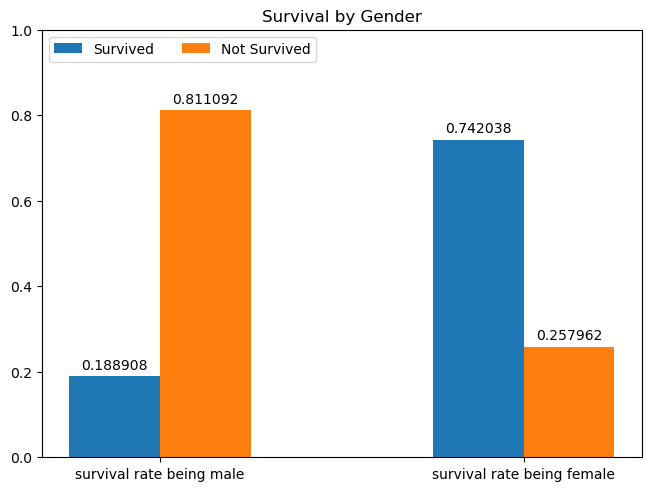

In [510]:
genders = ("survival rate being male", "survival rate being female")
attr_values = {
    'Survived': (len(male[male['Survived'] == 1])/len(male), len(female[female['Survived'] == 1])/len(female)),
    'Not Survived': (len(male[male['Survived'] == 0])/len(male), len(female[female['Survived'] == 0])/len(female)),
}

x = np.arange(len(genders))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in attr_values.items():
    offset = width * multiplier
    
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Survival by Gender')
ax.set_xticks(x + width/2, genders)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 1);

## Preproccess data before train

In [511]:
y_train = df_train['Survived']
df_train.drop(columns=['Survived'], inplace=True)
df_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,29.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [512]:
one_hot_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

## One-hot categorical features

In [513]:
df_train = pd.get_dummies(df_train, columns=one_hot_features)
df_test = pd.get_dummies(df_test, columns=one_hot_features)
df_train

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,False,False,True,False,True,False,True,False,...,True,False,False,False,False,False,False,False,False,True
1,38.0,71.2833,True,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False
2,26.0,7.9250,False,False,True,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
3,35.0,53.1000,True,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True
4,35.0,8.0500,False,False,True,False,True,True,False,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,False,True,False,False,True,True,False,False,...,True,False,False,False,False,False,False,False,False,True
887,19.0,30.0000,True,False,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
888,29.0,23.4500,False,False,True,True,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
889,26.0,30.0000,True,False,False,False,True,True,False,False,...,True,False,False,False,False,False,False,True,False,False


In [514]:
df_train.isna().sum()

Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

## Normalize continous features

In [515]:
X_train, X_val, y_train, y_val = train_test_split(
    df_train, y_train, test_size=0.2, random_state=0, shuffle=True)

In [516]:
y_train

140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 712, dtype: int64

## Reset the rows order number start form zero

In [517]:
X_train = pd.DataFrame(X_train.to_numpy(), columns=X_train.columns)
y_train = pd.DataFrame(y_train.to_numpy())
X_val = pd.DataFrame(X_val.to_numpy(), columns=X_val.columns)
y_val = pd.DataFrame(y_val.to_numpy())

In [518]:
cols = ['Age', 'Fare']
normalized_data_train = X_train[cols]
normalized_data_val = X_val[cols]
normalized_data_test = df_test[cols]

scaler = StandardScaler()
normalized_data_train = pd.DataFrame(scaler.fit_transform(normalized_data_train), columns=cols)
normalized_data_val = pd.DataFrame(scaler.transform(normalized_data_val), columns=cols)
normalized_data_test = pd.DataFrame(scaler.transform(normalized_data_test), columns=cols)

X_train[cols] = normalized_data_train[cols]
X_val[cols] = normalized_data_val[cols]
df_test[cols] = normalized_data_test[cols]

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
df_test = df_test.astype('float32')

In [519]:
normalized_data_val

,Age,Fare
0,-0.045676,-0.347398
1,-0.045676,-0.485288
2,-1.727166,-0.054650
3,-0.045676,2.288576
4,-0.045676,-0.331679
...,...,...
174,-1.268578,-0.491691
175,-0.045676,-0.475308
176,0.107186,1.624988
177,-0.504265,-0.479216


In [520]:
X_val

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,-0.045676,-0.347398,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.045676,-0.485288,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.727166,-0.054650,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.045676,2.288576,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.045676,-0.331679,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,-1.268578,-0.491691,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175,-0.045676,-0.475308,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
176,0.107186,1.624988,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
177,-0.504265,-0.479216,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [521]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [522]:
logistic_reg = LogisticRegression(penalty='l2')
logistic_reg.fit(X_train, y_train.to_numpy().ravel())
val_pred = logistic_reg.predict(X_val)
print('Accuracy:', accuracy_score(y_val, val_pred))
print(classification_report(y_val, val_pred))

Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [523]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train.to_numpy().ravel())
val_pred = rf.predict(X_val)
print('Accuracy:', accuracy_score(y_val, val_pred))
print(classification_report(y_val, val_pred))

Accuracy: 0.8324022346368715
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       110
           1       0.82      0.72      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



In [524]:
svm = SVC()
svm.fit(X_train, y_train.to_numpy().ravel())
val_pred = svm.predict(X_val)
print('Accuracy:', accuracy_score(y_val, val_pred))
print(classification_report(y_val, val_pred))

Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       110
           1       0.81      0.67      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



In [525]:
import xgboost as xgb

In [526]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")
xgb_model.fit(X_train, y_train.to_numpy().ravel(), eval_set=[(X_val, y_val)], verbose=False)
val_pred = xgb_model.predict(X_val)
print('Accuracy:', accuracy_score(y_val, val_pred))
print(classification_report(y_val, val_pred))

Accuracy: 0.8547486033519553
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       110
           1       0.84      0.77      0.80        69

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



## Submit predictions

In [527]:
# Predictions using the best model (XGBoost)
predictions = xgb_model.predict(df_test.drop(columns=['Parch_9'])) 

output = pd.DataFrame({'PassengerId': df_test1['PassengerId'], 'Survived': predictions})
output.to_csv('submission1.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
